In [89]:
import pandas as pd
import numpy as np

In [90]:
train = pd.read_csv("G:/dataset/yds_train2018.csv")
test= pd.read_csv("G:/dataset/yds_test2018.csv")
hols = pd.read_csv("G:/dataset/holidays.csv")
prom_exp = pd.read_csv("G:/dataset/promotional_expense.csv")
sample = pd.read_csv("G:/dataset/sample_submission.csv")

In [91]:
train.head(3)

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0


In [92]:
test.head(3)

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN


In [93]:
hols.head(3)

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag


In [94]:
prom_exp.head(3)

,Year,Month,Country,Product_Type,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590


In [95]:
total = pd.concat([train.drop(['Merchant_ID','Week'],axis =1),test],axis = 0)
print(train.drop(['Merchant_ID','Week'],axis =1).shape,test.shape,total.shape)
total.reset_index(drop = True,inplace = True)

(79072, 6) (105, 6) (79177, 6)


In [96]:
#test_sumb.to_csv("G:\sales_baseline.csv",index = False)
#gave_a_score_of_0.14245

In [97]:
total.describe()

,S_No,Year,Month,Product_ID,Sales
count,79177.000000,79177.000000,79177.000000,79177.000000,7.907200e+04
mean,39589.000000,2014.226518,6.282102,2.168496,1.049678e+05
std,22856.575469,0.981196,3.477763,1.136582,7.642310e+05
min,1.000000,2013.000000,1.000000,1.000000,-2.406069e+06
25%,19795.000000,2013.000000,3.000000,1.000000,9.524500e+02
50%,39589.000000,2014.000000,6.000000,2.000000,6.400000e+03
75%,59383.000000,2015.000000,9.000000,2.000000,2.418520e+04
max,79177.000000,2017.000000,12.000000,5.000000,3.487431e+07


G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


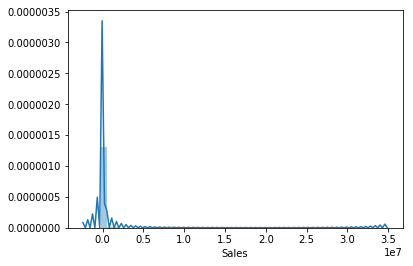

Wall time: 236 ms


In [98]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['Sales'],kde = True)
plt.show()

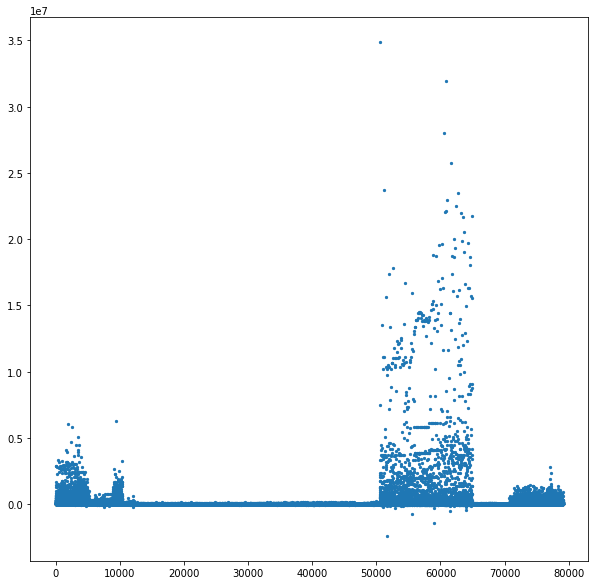

In [99]:
plt.figure(figsize = (10,10))
plt.scatter(range(len(train)),train['Sales'],5)
plt.show()

In [100]:
#Some_Outliers_above_2.5
#Lets_plot_in_ascending_order

In [101]:
print((train['Sales']<0).sum())
print((train['Sales']>=0).sum())

1002
78070


In [102]:
#total.loc[total['Sales']<0,'Sales'] = total.loc[total['Sales']<0,'Sales']*-1

In [103]:
#We_are_Assuming_the_-ve_values_should_be_positive_for_now

In [104]:
#drop = total[total['Sales']>= (2.5*pow(10,7))] 

In [105]:
train.pivot_table(values = 'Sales',index = 'Country',aggfunc = np.mean)

,Sales
Country,
Argentina,184389.013597
Belgium,17213.706822
Columbia,10236.654223
Denmark,344802.297530
England,4242.052965
Finland,114841.601688


In [106]:
train.pivot_table(values = 'Sales',index = 'Country',aggfunc = np.std)

,Sales
Country,
Argentina,3.905856e+05
Belgium,3.571066e+04
Columbia,1.479198e+04
Denmark,1.725301e+06
England,8.742854e+03
Finland,1.762177e+05


G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


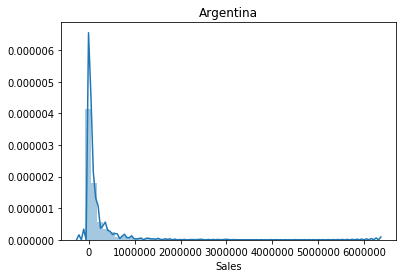

G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


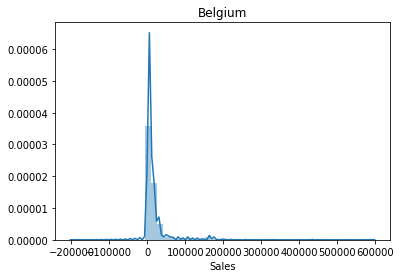

G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


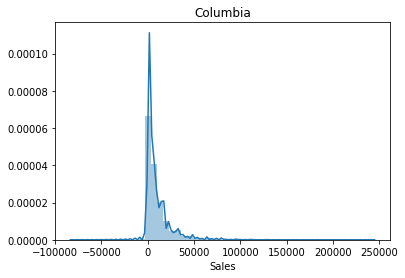

G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


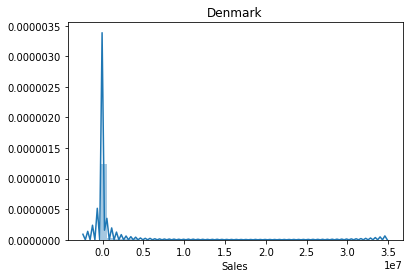

G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


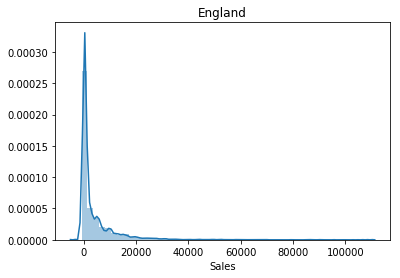

G:\anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


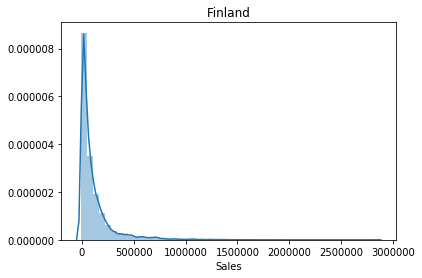

In [107]:
country = train.groupby(['Country'])
for i,j in country:
    sns.distplot(j['Sales'])
    plt.title(str(i))
    plt.show()

In [108]:
#drop1 = total.loc[(total['Country'] == 'Denmark') & (total['Sales'] >= 2.5* pow(10,7)) ].index.tolist()
#drop2 = total.loc[(total['Country'] == 'Argentina') & (total['Sales'] >= 6.0 * pow(10,6)) ].index.tolist()
#drop1.extend(drop2)
#print(total.shape)
#total.drop(drop1,inplace = True)
print(total.shape)

(79177, 6)


outliers in the case of Argentina and Denmark.

In [109]:
prom_exp.rename(columns = {'Product_Type':'Product_ID'},inplace = True)

In [110]:
prom_exp.head(3)

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590


In [111]:
total.head(3)

,S_No,Year,Month,Product_ID,Country,Sales
0,1,2013,1,1,Argentina,157500.0
1,2,2013,1,1,Argentina,39375.0
2,3,2013,1,1,Argentina,15750.0


In [112]:

total['Y,M,C,P_ID'] = total[['Year','Month','Country','Product_ID']].apply(tuple,axis = 1)
total.head(3)

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID"
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)"
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)"
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)"


In [113]:
prom_exp['Y,M,C,P_ID'] = prom_exp[['Year','Month','Country','Product_ID']].apply(tuple,axis = 1)
prom_exp.head(3)

,Year,Month,Country,Product_ID,Expense_Price,"Y,M,C,P_ID"
0,2013,1,Argentina,1,14749.307,"(2013, 1, Argentina, 1)"
1,2013,1,Argentina,2,1329.374,"(2013, 1, Argentina, 2)"
2,2013,1,Belgium,2,249.590,"(2013, 1, Belgium, 2)"


In [114]:
total.isnull().sum()

S_No            0
Year            0
Month           0
Product_ID      0
Country         0
Sales         105
Y,M,C,P_ID      0
dtype: int64

In [115]:
total_exp = pd.merge(total,prom_exp[prom_exp.columns[-2:]],on = 'Y,M,C,P_ID' , how ='left')
total_exp.head(3)

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID",Expense_Price
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)",14749.307
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)",14749.307
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)",14749.307


In [116]:
total_exp.isnull().sum()

S_No                0
Year                0
Month               0
Product_ID          0
Country             0
Sales             105
Y,M,C,P_ID          0
Expense_Price    5322
dtype: int64

Ignore, Merchant_ID,Sales and Week NA's , expense price can be imputed!! Lets see some techniques to impute expense price!
Maybe, expense price is going to be different for each country! W.R.T  , Sales!

In [117]:
exp_mean  = total_exp.pivot_table(values = 'Expense_Price',index = 'Country',aggfunc = np.mean)
exp_mean

,Expense_Price
Country,
Argentina,9215.554599
Belgium,513.601978
Columbia,2217.978184
Denmark,53841.839223
England,301.297494
Finland,1301.579420


In [118]:
temp = exp_mean.T.to_dict()
kk = list(temp.keys())
for i in (kk):
    temp[i] = list(temp[i].values())[0]
temp

{'Argentina': 9215.554599154204,
 'Belgium': 513.6019779295881,
 'Columbia': 2217.9781838247177,
 'Denmark': 53841.83922254848,
 'England': 301.2974944655779,
 'Finland': 1301.579420326453}

In [119]:
total_exp.loc[total_exp.Sales    < 0,'Country'].value_counts()

Denmark      757
Columbia     187
England       20
Argentina     15
Belgium       15
Finland        8
Name: Country, dtype: int64

In [120]:
total_exp.loc[total_exp.Sales    > 0,'Country'].value_counts()

Columbia     35353
Argentina     9848
Finland       7757
England       5743
Denmark       5013
Belgium       1874
Name: Country, dtype: int64

In [121]:
total_exp.loc[total_exp.Sales    ==  0,'Country'].value_counts()

Denmark      8682
Columbia     2730
Finland       560
Argentina     507
Belgium         2
England         1
Name: Country, dtype: int64

In [122]:
for _,i in enumerate(list(temp.keys())):
    total_exp.loc[(total_exp['Expense_Price'].isnull() == True) & (total_exp['Country'] == i),'Expense_Price'] = temp[i]

#total_exp.Expense_Price = total_exp.Expense_Price.fillna(total_exp.Sales.map(temp))
print(total_exp.isnull().sum())

S_No               0
Year               0
Month              0
Product_ID         0
Country            0
Sales            105
Y,M,C,P_ID         0
Expense_Price      0
dtype: int64


In [123]:
total_exp.head()

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID",Expense_Price
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)",14749.307
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)",14749.307
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)",14749.307
3,4,2013,1,1,Argentina,47250.0,"(2013, 1, Argentina, 1)",14749.307
4,5,2013,1,1,Argentina,283500.0,"(2013, 1, Argentina, 1)",14749.307


In [124]:
hols.head(3)

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag


In [125]:
hols['Year'],hols['Month'] = hols['Date'].apply(lambda x: int((str(x).split(','))[0])),hols['Date'].apply(lambda x: int((str(x).split(','))[1]))

In [126]:
hols.head(3)

,Date,Country,Holiday,Year,Month
0,"2014, 1, 1",Denmark,Nytårsdag,2014,1
1,"2014, 4, 17",Denmark,Skærtorsdag,2014,4
2,"2014, 4, 18",Denmark,Langfredag,2014,4


In [127]:
hols['Y_M'] = hols[['Year','Month']].apply(tuple,axis = 1)
hols.head(3)

,Date,Country,Holiday,Year,Month,Y_M
0,"2014, 1, 1",Denmark,Nytårsdag,2014,1,"(2014, 1)"
1,"2014, 4, 17",Denmark,Skærtorsdag,2014,4,"(2014, 4)"
2,"2014, 4, 18",Denmark,Langfredag,2014,4,"(2014, 4)"


In [128]:
holidays = dict(hols['Y_M'].value_counts())

In [129]:
total_exp['Y_M'] = total_exp[['Year','Month']].apply(tuple,axis = 1)
total_exp.head(3)

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID",Expense_Price,Y_M
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"


In [130]:
total_exp.head()

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID",Expense_Price,Y_M
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
3,4,2013,1,1,Argentina,47250.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"
4,5,2013,1,1,Argentina,283500.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)"


In [131]:
%%time
k = list(holidays.keys())
for _,i in enumerate(range(len(total_exp))):
    a = total_exp.loc[i,'Y_M']
    if a in k:
        total_exp.loc[i,'#_Hols'] = holidays[a]
    else:
        total_exp.loc[i,'#_Hols'] = 0

Wall time: 46.2 s


In [132]:
#Try to lessen time

In [133]:
total_exp.head(3)

,S_No,Year,Month,Product_ID,Country,Sales,"Y,M,C,P_ID",Expense_Price,Y_M,#_Hols
0,1,2013,1,1,Argentina,157500.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)",8.0
1,2,2013,1,1,Argentina,39375.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)",8.0
2,3,2013,1,1,Argentina,15750.0,"(2013, 1, Argentina, 1)",14749.307,"(2013, 1)",8.0


In [134]:
hols['Holiday'].nunique()
#will_deal_with_it_later

86

In [135]:
final = total_exp.copy()

In [136]:
final.drop(['S_No','Y,M,C,P_ID','Y_M'],axis = 1, inplace = True)

In [137]:
final.head(3)

,Year,Month,Product_ID,Country,Sales,Expense_Price,#_Hols
0,2013,1,1,Argentina,157500.0,14749.307,8.0
1,2013,1,1,Argentina,39375.0,14749.307,8.0
2,2013,1,1,Argentina,15750.0,14749.307,8.0


In [138]:
final.loc[final['Sales']>0].min()

Year                  2013
Month                    1
Product_ID               1
Country          Argentina
Sales                 0.01
Expense_Price      153.179
#_Hols                   0
dtype: object

In [139]:
final.loc[final['Sales']<0,'Sales'].min()

-2406068.72

In [140]:
%%time
final['result'] =  np.ones((len(final),1))
final.loc[final['Sales'] > 0,'result'] = 'P'
final.loc[final['Sales'] < 0,'result'] = 'N'
final.loc[final['Sales'] == 0,'result'] = 'Z'

Wall time: 32.9 ms


In [141]:
final['result'].value_counts()

P      65588
Z      12482
N       1002
1.0      105
Name: result, dtype: int64

In [142]:
final_2 = pd.get_dummies(final, columns = ['Year','Month','Product_ID'])

In [143]:
final_2.head(3)

,Country,Sales,Expense_Price,#_Hols,result,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,...,Month_8,Month_9,Month_10,Month_11,Month_12,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_4,Product_ID_5
0,Argentina,157500.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Argentina,39375.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Argentina,15750.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [144]:
convert = {'Argentina':0.036,'Belgium':1.17 , 'Columbia':0.00035,'Denmark':0.16,'England':1.31,'Finland':1.17}

In [145]:
%%time
countries = np.unique(final_2['Country']).tolist()
for i in countries:
    final_2.loc[final_2['Country'] == i,'Sales'] = final_2.loc[final_2['Country'] == i,'Sales']*convert[i]

Wall time: 389 ms


In [146]:
final_2.pivot_table(values = 'Sales',index = 'Country',aggfunc = np.mean)

,Sales
Country,
Argentina,6638.004489
Belgium,20140.036981
Columbia,3.582829
Denmark,55168.367605
England,5557.089384
Finland,134364.673975


In [148]:
final_2.head(3)

,Country,Sales,Expense_Price,#_Hols,result,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,...,Month_8,Month_9,Month_10,Month_11,Month_12,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_4,Product_ID_5
0,Argentina,5670.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Argentina,1417.5,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Argentina,567.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer

In [150]:
def smape(y,y_pred):
    t1 = y_pred - y
    t2 =  (np.abs(y) + np.abs(y_pred))/2.0
    t3 = t1/t2
    n = len(t1)
    return ( ((100.0) * (t3.sum()))/float(n))

In [151]:
SMAPE = make_scorer(smape)

In [152]:
train_2,test_2 = final_2.iloc[:len(train),:],final_2.iloc[len(train):,:]
print(train_2.shape,train.shape,test_2.shape,test.shape)

(79072, 27) (79072, 8) (105, 27) (105, 6)


In [153]:
train_2.head()

,Country,Sales,Expense_Price,#_Hols,result,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,...,Month_8,Month_9,Month_10,Month_11,Month_12,Product_ID_1,Product_ID_2,Product_ID_3,Product_ID_4,Product_ID_5
0,Argentina,5670.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Argentina,1417.5,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Argentina,567.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Argentina,1701.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Argentina,10206.0,14749.307,8.0,P,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [154]:
train_3,test_3 = pd.get_dummies(train_2, columns = ['Country']),pd.get_dummies(test_2, columns = ['Country'])
train_3.head()

,Sales,Expense_Price,#_Hols,result,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Month_1,...,Product_ID_2,Product_ID_3,Product_ID_4,Product_ID_5,Country_Argentina,Country_Belgium,Country_Columbia,Country_Denmark,Country_England,Country_Finland
0,5670.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1417.5,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,567.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1701.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,10206.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [155]:
#group = train_2.groupby(['Country'])
#scores = dict()
#for i,j in group:
    #rfc = RandomForestClassifier()
    #rfr = RandomForestRegressor()
    #j1 = j.drop(['Country'],axis = 1)
    #rfc.fit()
    #scores[i] = cross_val_score(rfc,x1,y1,cv = 3).mean()
#print(2 - (np.array(list(scores.values())).mean())/100.0)'''
#print("-----")

In [156]:
train_3 = pd.get_dummies(train_2,columns = ['Country'])
test_3 = pd.get_dummies(test_2,columns = ['Country'])
train_3.head()

,Sales,Expense_Price,#_Hols,result,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Month_1,...,Product_ID_2,Product_ID_3,Product_ID_4,Product_ID_5,Country_Argentina,Country_Belgium,Country_Columbia,Country_Denmark,Country_England,Country_Finland
0,5670.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1417.5,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,567.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1701.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,10206.0,14749.307,8.0,P,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [158]:
no_frauds = len(train_3[train_3['result'] == 'N'])
non_fraud_indices_1 = train_3[train_3.result == 'P'].index
non_fraud_indices_2 = train_3[train_3.result == 'Z'].index
random_indices_1 = np.random.choice(non_fraud_indices_1,no_frauds, replace=False)
random_indices_2 = np.random.choice(non_fraud_indices_2,no_frauds, replace=False)
fraud_indices = train_3[train_3.result == 'N'].index
under_sample_indices = np.concatenate([fraud_indices,random_indices_1,random_indices_2])
under_sample = train_3.loc[under_sample_indices]

In [160]:
#undersampling done above
under_sample['result'].value_counts()

N    1002
P    1002
Z    1002
Name: result, dtype: int64

In [164]:
under_sample.shape

(3006, 32)

In [169]:
rfc = RandomForestClassifier()
cross_val_score(rfc,under_sample.drop(['Sales','result'],axis =1 ),under_sample.result,cv = 10)

array([0.35973597, 0.38943894, 0.39333333, 0.42      , 0.34333333,
       0.4       , 0.39333333, 0.37666667, 0.39666667, 0.4       ])

In [173]:
rfc.fit(under_sample.drop(['Sales','result'],axis =1 ),under_sample.result)
pred = rfc.predict(test_3.drop(['Sales','result'],axis =1 ))
test_3['result'] = pred

In [177]:
f_pred = pd.DataFrame()
for i in np.unique(train_3.result):
    temp = train_3.loc[train_3['result'] == i]
    temp1 = test_3.loc[test_3['result'] == i]
    rf = RandomForestRegressor()
    rf.fit(temp.drop(['result','Sales'],axis =1),temp['Sales'])
    pred = pd.DataFrame(rf.predict(temp1.drop(['result','Sales'],axis =1)))
    pred.index = temp1.index
    f_pred = pd.concat([f_pred,pred])
f_pred
    
    


,0
79099,-5187.552670
79104,-9535.332495
79105,-94996.993845
79106,-3590.001383
79107,-184331.975782
79116,-1.379454
79137,-0.841246
79138,-7957.888437
79140,-2787.538506
79141,-1867.837393


In [191]:
f_pred.sort_index(inplace = True)

In [192]:
test.head(3)

,S_No,Year,Month,Product_ID,Country,Sales,result
0,79073,2016,4,1,Argentina,NaN,P
1,79074,2016,5,1,Argentina,NaN,Z
2,79075,2016,6,1,Argentina,NaN,P


In [196]:
f_pred.reset_index(inplace = True,drop = True)

In [200]:
f_pred.drop(['index'],axis = 1 ,inplace = True)

In [202]:
test['Sales'] = f_pred

In [204]:
test.iloc[:,:-1].to_csv("G:/non.csv")

In [205]:
for i in countries:
    test.loc[test['Country'] == i,'Sales'] = test.loc[test['Country'] == i,'Sales']/float(convert[i])

In [208]:
test.iloc[:,:-1].to_csv("G:/yes.csv",index = False)

In [209]:
test.iloc[:,:-1]

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,0.000000
1,79074,2016,5,1,Argentina,200336.337772
2,79075,2016,6,1,Argentina,196485.160769
3,79076,2016,7,1,Argentina,142850.519482
4,79077,2016,8,1,Argentina,214799.591543
5,79078,2016,9,1,Argentina,252297.290538
6,79079,2016,10,1,Argentina,142850.519482
7,79080,2016,11,1,Argentina,218157.095537
8,79081,2016,12,1,Argentina,143482.882480
9,79082,2017,1,1,Argentina,227152.242172


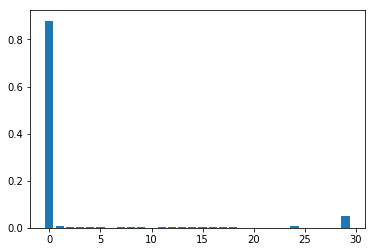

In [578]:
plt.bar(range(len(train_3.columns)-1),rf1.feature_importances_)
plt.show()

In [587]:
train_3.loc[train_3['Sales']<0,'Sales'] = -1*train_3.loc[train_3['Sales']<0,'Sales']


0

In [585]:
rf2 = RandomForestRegressor()
cross_val_score(rf2,(train_3[train_3.columns[1]]).reshape(-1,1),(train_3[train_3.columns[0]]),cv = 20,scoring = make_scorer(smape)).mean()

G:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


78.92555728700191

In [581]:
2 - 79/100.0

1.21